<a href="https://colab.research.google.com/github/RahulArra/Machine-Learning/blob/main/Ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

# For evaluating the model
from sklearn.metrics import accuracy_score
# loading iris dataset
iris = load_iris()
X = iris.data[:, :4]
Y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20,random_state = 42)
estimator = []
estimator.append(('LR', LogisticRegression(solver='lbfgs', max_iter=100)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=42)))

# Voting Classifier with hard voting
hard_voting = VotingClassifier(estimators = estimator, voting ='hard')
soft_voting = VotingClassifier(estimators = estimator, voting ='soft')
hard_voting.fit(X_train, y_train)
soft_voting.fit(X_train, y_train)
y_pred = hard_voting.predict(X_test)
y_pred1 = soft_voting.predict(X_test)
# accuracy_score metric to predict Accuracy
score = accuracy_score(y_test, y_pred)
score1= accuracy_score(y_test,y_pred1)
print("Hard Voting Score % d" % score)
print("Softard Voting Score % d" % score1)



Hard Voting Score  1
Softard Voting Score  1


no change in o/p with change in max_iter in LogisticRegression
and when change in max_dpth in decision tree

In [18]:
#  WHY ADV ENSEMBLE LEANRNING TECH:
# 1. They Prevent Overfitting and Generalize Better
# 2. They Are More Stable and Robust
# 3. They Combine Different Strengths


In [51]:
#RANDOMFORESTCLASSIFER(bagging)
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=5, n_redundant=0, random_state=50)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build a random forest classifier with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = clf.score(X_test, y_test)
print("Accuracy: %.2f" % accuracy)


Accuracy: 0.93


In [ ]:
#decrease iun smaple leading t ess acuracy
#increase in n_informative is dec the acc
#change in random_state is affecting

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# We make it non-trivial so the ensemble has a chance to shine.
X, y = make_classification(
    n_samples=1000,
    n_features=50,
    n_informative=15, # Only 15 of the 50 features are useful
    n_redundant=5,
    n_classes=2,
    random_state=42
)

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



print("--- Comparing Single Decision Tree vs. Random Forest ---")

# a. Train a single Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    ccp_alpha=0.01,
    random_state=0
)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

# b. Train a Random Forest Classifier
# n_estimators=100 means it will build 100 decision trees.
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

# c. Print the performance metrics for comparison
print("\nMetrics for Single Decision Tree:")
print(classification_report(y_test, dt_predictions))

print("\nMetrics for Random Forest (100 Trees):")
print(classification_report(y_test, rf_predictions))



# print("\n--- Exploring the Effect of n_estimators in Random Forest ---")

# # We will test a range of estimator numbers from 1 to 150
# estimator_counts = range(1, 151)
# accuracies = []

# for count in estimator_counts:
#     # Create and train a new RF model for each count
#     temp_rf = RandomForestClassifier(n_estimators=count, random_state=42)
#     temp_rf.fit(X_train, y_train)

#     # Predict and calculate accuracy
#     temp_predictions = temp_rf.predict(X_test)
#     accuracy = accuracy_score(y_test, temp_predictions)
#     accuracies.append(accuracy)

# plt.figure(figsize=(10, 6))
# plt.plot(estimator_counts, accuracies, marker='.', linestyle='-')
# plt.title('Random Forest Accuracy vs. Number of Estimators')
# plt.xlabel('Number of Estimators (Trees)')
# plt.ylabel('Accuracy Score')
# plt.grid(True)
# plt.show()


--- Comparing Single Decision Tree vs. Random Forest ---

Metrics for Single Decision Tree:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       131
           1       0.65      0.59      0.62       119

    accuracy                           0.66       250
   macro avg       0.66      0.65      0.65       250
weighted avg       0.66      0.66      0.65       250


Metrics for Random Forest (100 Trees):
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       131
           1       0.89      0.84      0.87       119

    accuracy                           0.88       250
   macro avg       0.88      0.87      0.88       250
weighted avg       0.88      0.88      0.88       250



In [ ]:

# inc with the n_estimater(no of decisions trees) increases the accuracy
#so we conclude that with inc in no of n_estimater the res is increasing but at a value it's decreasing or same after a value

In [60]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Import the individual models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# --- 1. Dataset Preparation ---
# Create a dataset with 3 classes, making it a non-trivial problem
X, y = make_classification(
    n_samples=1500,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_classes=3,
    random_state=42
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 2. Train Individual Classifiers ---
# We will use three diverse models for our ensemble
model1 = LogisticRegression(random_state=42)
model2 = KNeighborsClassifier(n_neighbors=5)
model3 = SVC(probability=True, random_state=42) # probability=True is essential for soft voting

# Fit the models on the training data
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# --- 3. Get Predictions from Individual Models ---
# Get class predictions (for Max Voting)
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

# Get probability predictions (for Average and Weighted Voting)
prob1 = model1.predict_proba(X_test)
prob2 = model2.predict_proba(X_test)
prob3 = model3.predict_proba(X_test)


# a) Max Voting (Hard Voting)
# We stack the predictions and find the mode (most frequent class) for each sample
stacked_preds = np.array([pred1, pred2, pred3])
max_voting_preds = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=stacked_preds)

# b) Average Voting (Soft Voting)
# We sum the probabilities from each model and choose the class with the highest average probability
avg_probs = (prob1 + prob2 + prob3) / 3
average_voting_preds = np.argmax(avg_probs, axis=1)

# c) Weighted Average Voting
# First, get the accuracy of each model on the training set to use as weights
weight1 = accuracy_score(y_train, model1.predict(X_train))
weight2 = accuracy_score(y_train, model2.predict(X_train))
weight3 = accuracy_score(y_train, model3.predict(X_train))

# Calculate the weighted average of probabilities
weighted_probs = (weight1 * prob1 + weight2 * prob2 + weight3 * prob3)
weighted_average_preds = np.argmax(weighted_probs, axis=1)

# --- 5. Compare Results ---
print("--- Performance of Individual Models ---")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, pred1):.4f}")
print(f"K-Nearest Neighbors Accuracy: {accuracy_score(y_test, pred2):.4f}")
print(f"Support Vector Machine Accuracy: {accuracy_score(y_test, pred3):.4f}")

print("\n--- Performance of Ensemble Techniques ---")
print(f"Max Voting Accuracy: {accuracy_score(y_test, max_voting_preds):.4f}")
print(f"Average Voting Accuracy: {accuracy_score(y_test, average_voting_preds):.4f}")
print(f"Weighted Average Voting Accuracy: {accuracy_score(y_test, weighted_average_preds):.4f}")

print("\nWeights used for Weighted Average Voting:")
print(f"LR Weight: {weight1:.4f}, KNN Weight: {weight2:.4f}, SVC Weight: {weight3:.4f}")

--- Performance of Individual Models ---
Logistic Regression Accuracy: 0.6844
K-Nearest Neighbors Accuracy: 0.8311
Support Vector Machine Accuracy: 0.8533

--- Performance of Ensemble Techniques ---
Max Voting Accuracy: 0.8400
Average Voting Accuracy: 0.8356
Weighted Average Voting Accuracy: 0.8422

Weights used for Weighted Average Voting:
LR Weight: 0.6990, KNN Weight: 0.8895, SVC Weight: 0.9076


--- Baseline Model ---
Baseline Accuracy: 0.9708
-------------------------

---  Varying Number of Estimators ---


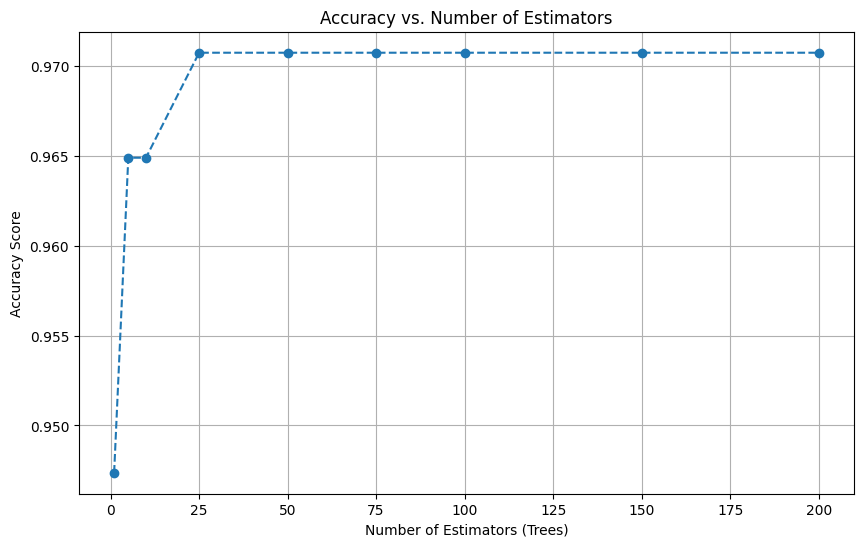


--- Varying Maximum Depth ---


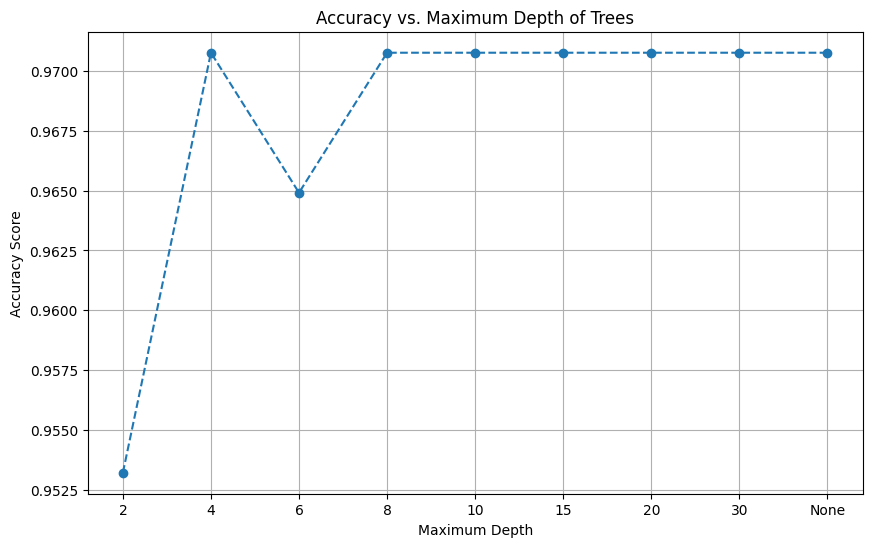


Multiple runs WITH a diff bultin random_state :
  Run 1 Accuracy: 0.9708
  Run 2 Accuracy: 0.9766
  Run 3 Accuracy: 0.9649
Multiple runs WITHOUT a fixed random_state:
  Run 1 Accuracy: 0.9708
  Run 2 Accuracy: 0.9649
  Run 3 Accuracy: 0.9766

Multiple runs WITH a fixed random_state (42):
  Run 1 Accuracy: 0.9708
  Run 2 Accuracy: 0.9708
  Run 3 Accuracy: 0.9708


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer # <-- Updated import
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#  Dataset Preparation ---
# Using the real-world Breast Cancer dataset as requested
data = load_breast_cancer()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Baseline Model Performance ---
print("--- Baseline Model ---")
baseline_rf = RandomForestClassifier(random_state=42)
baseline_rf.fit(X_train, y_train)
baseline_preds = baseline_rf.predict(X_test)
print(f"Baseline Accuracy: {accuracy_score(y_test, baseline_preds):.4f}")
print("-" * 25 + "\n")


# : Effect of Number of Estimators (n_estimators) ---
print("---  Varying Number of Estimators ---")
estimator_range = [1, 5, 10, 25, 50, 75, 100, 150, 200]
accuracies_estimators = []

for n in estimator_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)
    accuracies_estimators.append(accuracy_score(y_test, preds))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(estimator_range, accuracies_estimators, marker='o', linestyle='--')
plt.title('Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()


print("\n--- Varying Maximum Depth ---")
depth_range = [2, 4, 6, 8, 10, 15, 20, 30, None] # None means nodes are expanded until pure
accuracies_depth = []

for depth in depth_range:
    # Using 100 estimators as a standard base
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)
    accuracies_depth.append(accuracy_score(y_test, preds))

# Plotting the results
plt.figure(figsize=(10, 6))
# Using strings for the x-axis to handle the 'None' case nicely
depth_labels = [str(d) for d in depth_range]
plt.plot(depth_labels, accuracies_depth, marker='o', linestyle='--')
plt.title('Accuracy vs. Maximum Depth of Trees')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()

arr=[40,32,50]

print("\nMultiple runs WITH a diff bultin random_state :")
for i in range(3):
    rf_with_state = RandomForestClassifier(n_estimators=50, random_state=arr[i])
    rf_with_state.fit(X_train, y_train)
    preds = rf_with_state.predict(X_test)
    print(f"  Run {i+1} Accuracy: {accuracy_score(y_test, preds):.4f}")

#  Without a fixed random_state
print("Multiple runs WITHOUT a fixed random_state:")
for i in range(3):
    rf_no_state = RandomForestClassifier(n_estimators=50) # Smaller n_estimators to show variability
    rf_no_state.fit(X_train, y_train)
    preds = rf_no_state.predict(X_test)
    print(f"  Run {i+1} Accuracy: {accuracy_score(y_test, preds):.4f}")

#  With a fixed random_state
print("\nMultiple runs WITH a fixed random_state (42):")
for i in range(3):
    rf_with_state = RandomForestClassifier(n_estimators=50, random_state=42)
    rf_with_state.fit(X_train, y_train)
    preds = rf_with_state.predict(X_test)
    print(f"  Run {i+1} Accuracy: {accuracy_score(y_test, preds):.4f}")

In [ ]:
# change in


* **Significance**: The OOB score is a reliable, built-in estimate of how well your model will perform on **new, unseen data**. It serves as an internal validation score.


In [66]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# --- 1. Dataset Preparation ---
# Create a synthetic dataset suitable for a regression task.
X, y = make_regression(
    n_samples=500,
    n_features=20,
    n_informative=10,
    random_state=42
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


rf_regressor = RandomForestRegressor(
    n_estimators=100,
    oob_score=True, # <-- This enables the OOB score calculation
    random_state=42
)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)


#  Observe and Interpret the Results ---

# a) Get the OOB Score

oob_score = rf_regressor.oob_score_
print(f"Out-of-Bag (OOB) Score: {oob_score:.4f}")

test_predictions = rf_regressor.predict(X_test)

# Calculate the R-squared score on the test set
test_r2_score = r2_score(y_test, test_predictions)
print(f"Test Set R-squared Score: {test_r2_score:.4f}")

Out-of-Bag (OOB) Score: 0.7448
Test Set R-squared Score: 0.7571
